In [5]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#データの読み込み
df = pd.read_csv('/Users/aruhy/OneDrive/デスクトップ/勉強/ANN_10-18/CD_3D 0.4-0.9V')

In [12]:
df1 = df.rename(columns={'V[V]': 'V'})
df1

,Unnamed: 0,x座標,y座標,z座標,V,i[A/m^2]
0,0,0.000800,0.010441,0.000633,0.4,27966.558421
1,1,0.000800,0.010540,0.000633,0.4,28018.444979
2,2,0.000800,0.010540,0.000617,0.4,28328.592610
3,3,0.000738,0.010638,0.000617,0.4,28886.594133
4,4,0.000769,0.010638,0.000617,0.4,28624.930799
...,...,...,...,...,...,...
93920,7220,0.000123,0.000000,0.000567,0.9,4980.061749
93921,7221,0.000123,0.000000,0.000550,0.9,4980.194067
93922,7222,0.000154,0.000099,0.000550,0.9,4958.292001
93923,7223,0.000154,0.000000,0.000567,0.9,4958.258883


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 65747, number of used features: 4
[LightGBM] [Info] Start training from score 18989.153390
[ 4932.33690001 22941.40641269  9163.9135479  ... 33194.90666055
  6930.49554844 25263.6361649 ]


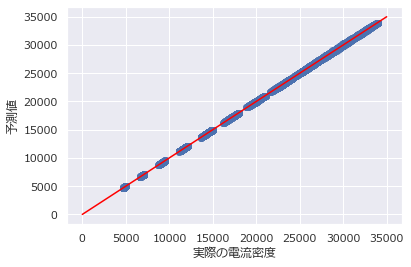

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

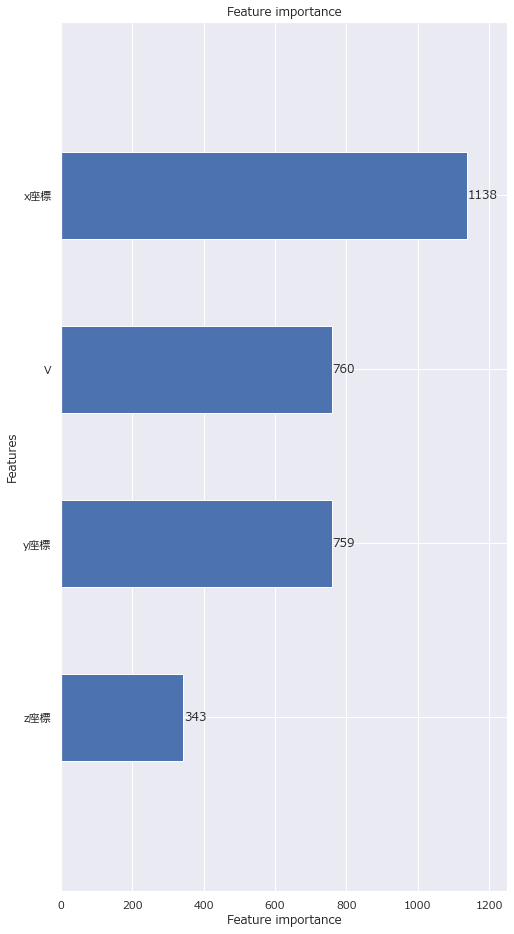

In [14]:
#予測ターゲットの格納（住宅価格：A列）
target_df = df1[["i[A/m^2]"]]
#特徴量の格納（説明変数：B列以降）
train_df = df1.iloc[:,1:5]

#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)

#XGBoostで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 35000), np.linspace(0, 35000), "red")
plt.xlabel('実際の電流密度')
plt.ylabel('予測値')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

In [15]:
df2 = df1[df1['V'].isin(['0.4'])]

In [17]:
df3 = model.predict(df2.iloc[:,1:5])

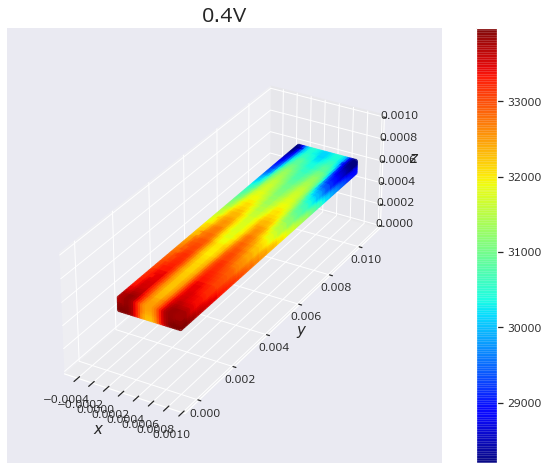

In [19]:
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter(df2['x座標'], df2['y座標'],df2['z座標'], c=df3, cmap='jet', alpha=0.8)
plt.colorbar(sc1)

ax1.set_title("0.4V", fontsize=20)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.set_zlabel('$z$', fontsize=15)
ax1.set_box_aspect((1,3,1))

ax1.set_xlim(-0.00055,0.001)
#ax1.set_ylim(0,0.015)
ax1.set_zlim(0,0.001)

#plt.savefig('PEM_CD_COMSOL.png')
plt.show()

In [22]:
df4 = df2.replace({'V': {0.4: 0.82}})
df5 = model.predict(df4.iloc[:,1:5])

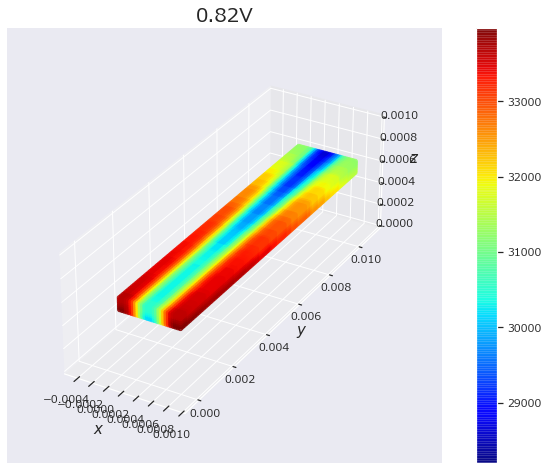

In [24]:
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(df4['x座標'], df4['y座標'],df4['z座標'], c=df5, cmap='jet', alpha=0.8)
plt.colorbar(sc1)

ax2.set_title("0.82V", fontsize=20)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.set_zlabel('$z$', fontsize=15)
ax2.set_box_aspect((1,3,1))

ax2.set_xlim(-0.00055,0.001)
#ax2.set_ylim(0,0.015)
ax2.set_zlim(0,0.001)

#plt.savefig('PEM_CD_COMSOL.png')
plt.show()